In [1]:
import torch
from torch import nn
import torchvision.transforms as transforms
from sklearn.utils.class_weight import compute_class_weight

import os
import json
import xml.etree.ElementTree as ET
import numpy as np
import math
import random
from PIL import Image, ImageDraw, ImageFont
import cv2
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

from utils import *

In [2]:
def detect_image(original_image, anno):
    image = original_image.copy()
    det_boxes, det_labels = anno['boxes'], anno['labels']
    det_boxes = torch.tensor(det_boxes)
    # Decode class integer labels
    det_labels = [rev_label_map[l] for l in det_labels]
    if det_labels == ['background']:
        # Just return original image
        return original_image
    annotated_image = image
    draw = ImageDraw.Draw(annotated_image)
    for i in range(det_boxes.size(0)):
        box_location = det_boxes[i].tolist()
        draw.rectangle(xy=box_location, outline=label_color_map[det_labels[i]], width=5)
    return annotated_image

In [3]:
images = []
with open('TRAIN_images.json', 'r') as file:
    data = json.load(file)
    for i in range(2):
        images.append(Image.open(data[i]))

annos = []
with open('TRAIN_objects.json', 'r') as file:
    data = json.load(file)
    for i in range(2):
        annos.append(data[i])

## Пример изображения 

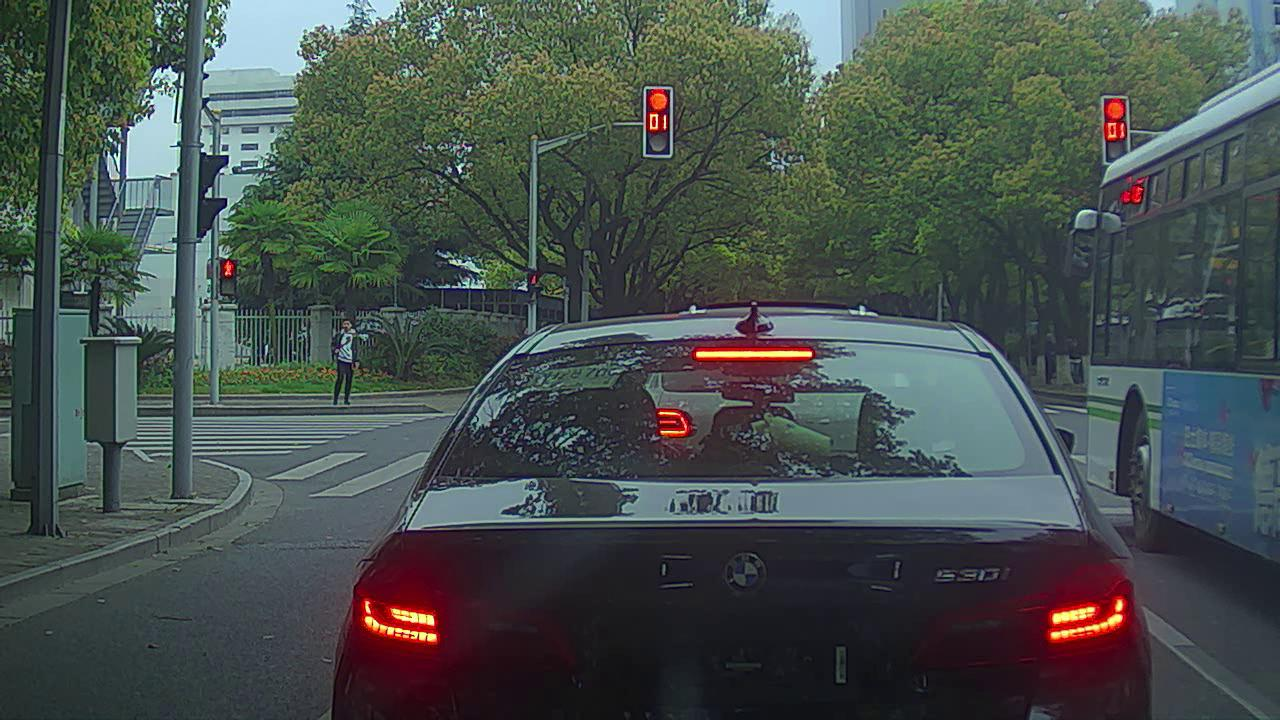

In [4]:
img = Image.open('S2TLD_720x1280/normal_1/JPEGImages/000001.jpg')
img

## Пример изображений с аннотациями 

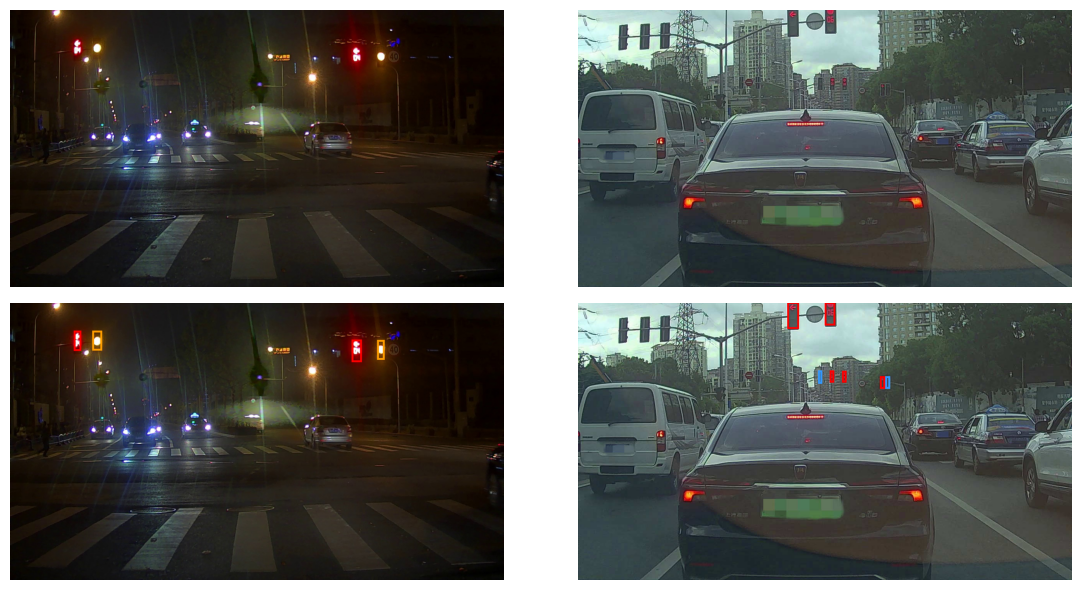

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < 2:
        ax.imshow(images[i])
    else:
        ax.imshow(detect_image(images[i-2], annos[i-2]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## Анализ датасета 

In [6]:
all_labels = []

with open('TRAIN_objects.json', 'r') as file:
    data = json.load(file)
    for obj in data:
        labels = obj['labels']
        for label in labels:
            all_labels.append(rev_label_map[label])

print(f'TOTAL OBJECTS: {len(all_labels)}')  

TOTAL OBJECTS: 9716


In [7]:
counter = Counter(all_labels)
counter

Counter({'red': 5712, 'yellow': 155, 'off': 394, 'green': 3455})

In [8]:
colors = np.array(sorted(list(dict(counter).items()), key=lambda x: x[1]))
colors

array([['yellow', '155'],
       ['off', '394'],
       ['green', '3455'],
       ['red', '5712']], dtype='<U11')

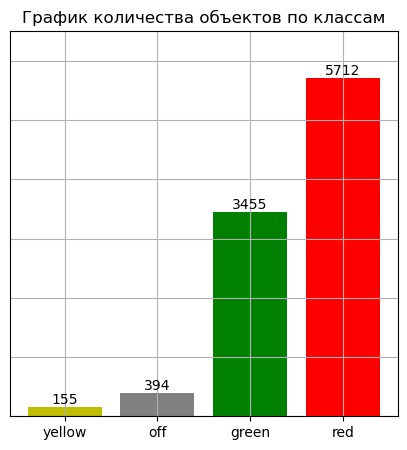

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.set_title('График количества объектов по классам')
ax.bar(colors[:, 0], colors[:, 1].astype('float32'), color=['y', 'gray', 'g', 'r'])
ax.set(ylim=(0,6500))
plt.tick_params(labelleft = False, left=False)
ax.bar_label(ax.containers[0], colors[:, 1].astype('int'))
ax.grid();
plt.savefig('График количества объектов по классам.png')

In [10]:
all_labels = []
with open('TRAIN_objects.json', 'r') as file:
    data = json.load(file)
    for obj in data:
        labels = list(set(obj['labels']))
        for label in labels:
            all_labels.append(rev_label_map[label])

counter = Counter(all_labels)
counter

Counter({'red': 2515, 'yellow': 89, 'off': 240, 'green': 1766})

In [11]:
colors = np.array(sorted(list(dict(counter).items()), key=lambda x: x[1]))
colors

array([['yellow', '89'],
       ['off', '240'],
       ['green', '1766'],
       ['red', '2515']], dtype='<U11')

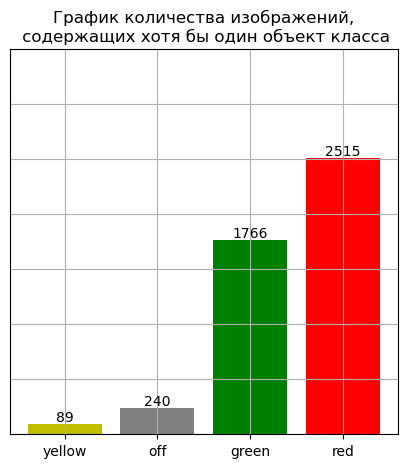

In [12]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.set_title('График количества изображений,\n содержащих хотя бы один объект класса')
ax.bar(colors[:, 0], colors[:, 1].astype('float32'), color=['y', 'gray', 'g', 'r'])
ax.set(ylim=(0,3500))
plt.tick_params(labelleft = False, left=False)
ax.bar_label(ax.containers[0], colors[:, 1].astype('int'))
ax.grid();
plt.savefig('График количества изображений.png')